# 11.3. Segmenting an image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.color import lab2rgb
%matplotlib inline

In [2]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(img, cmap=cmap)
    ax.set_axis_off()
    plt.show()

In [3]:
img = coins()

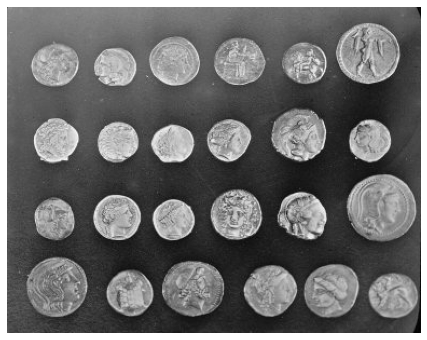

In [4]:
show(img)

In [5]:
threshold_otsu(img)

107

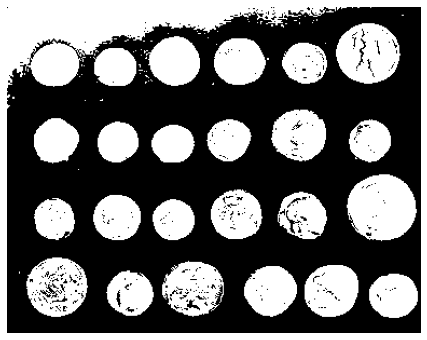

In [6]:
show(img > 107)

In [7]:
from ipywidgets import widgets

@widgets.interact(t=(50, 240))
def threshold(t):
    show(img > t)

interactive(children=(IntSlider(value=145, description='t', max=240, min=50), Output()), _dom_classes=('widget…

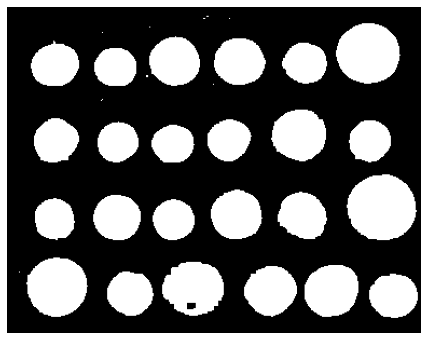

In [10]:
img_bin = clear_border(closing(img > 120, square(5)))
show(img_bin)

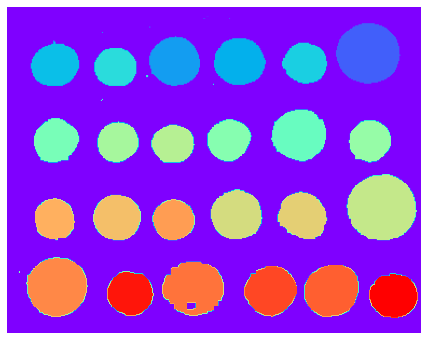

In [11]:
labels = label(img_bin)
show(labels, cmap=plt.cm.rainbow)

In [12]:
regions = regionprops(labels)
boxes = np.array([label['BoundingBox']
                  for label in regions
                  if label['Area'] > 100])
print(f"There are {len(boxes)} coins.")

There are 24 coins.


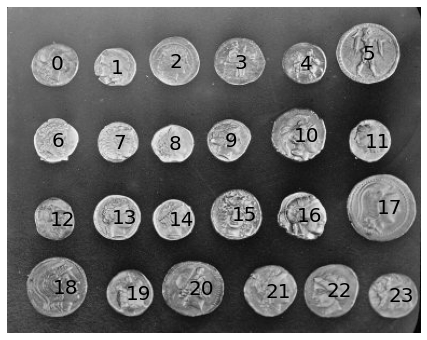

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()

# Get the coordinates of the boxes.
xs = boxes[:, [1, 3]].mean(axis=1)
ys = boxes[:, [0, 2]].mean(axis=1)

# We reorder the boxes by increasing
# column first, and row second.
for row in range(4):
    # We select the coins in each of the four rows.
    if row < 3:
        ind = ((ys[6 * row] <= ys) &
               (ys < ys[6 * row + 6]))
    else:
        ind = (ys[6 * row] <= ys)
    # We reorder by increasing x coordinate.
    ind = np.nonzero(ind)[0]
    reordered = ind[np.argsort(xs[ind])]
    xs_row = xs[reordered]
    ys_row = ys[reordered]
    # We display the coin number.
    for col in range(6):
        n = 6 * row + col
        ax.text(xs_row[col] - 5, ys_row[col] + 5,
                str(n),
                fontsize=20)